<a href="https://colab.research.google.com/github/karthiksagarN/DeepFake-Detection/blob/main/deepfake_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torch
!pip install face-recognition

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [3]:

import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames

#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([transforms.ToPILImage(),
                                      transforms.Resize((im_size,im_size)),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean,std)])
video =  glob.glob('/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/*.mp4')
video += glob.glob('/content/drive/MyDrive/DeepFake/FF++/facecropped/real/*.mp4')

print("Total no of videos :" , len(video))
print(video)
count = 0
for i in video:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video) - count))

Total no of videos : 299
['/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/06_27__walking_and_outside_surprised__O7L5Z9U8.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/03_07__walking_outside_cafe_disgusted__IFSURI9X.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/03_04__outside_talking_pan_laughing__T04P6ELC.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/03_06__podium_speech_happy__83ABVHC3.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/03_07__walk_down_hall_angry__IFSURI9X.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/02_27__walk_down_hall_angry__78M8S6M6.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/02_18__walking_down_street_outside_angry__21JTDDEL.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/03_07__walk_down_hall_angry__6PHZRQ4H.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/03_04__talking_angry_couch__T04P6ELC.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecro

In [4]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob("/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/*.mp4")
video_files += glob.glob('/content/drive/MyDrive/DeepFake/FF++/facecropped/real/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)

frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [151, 151, 148, 151, 151, 145, 151, 151, 113, 151, 125, 134, 151, 151, 137, 151, 145, 151, 146, 151, 151, 151, 151, 151, 151, 151, 151, 145, 151, 151, 151, 149, 142, 151, 151, 151, 151, 151, 151, 151, 150, 151, 151, 151, 145, 151, 151, 151, 151, 136, 151, 151, 151, 151, 148, 151, 134, 151, 147, 151, 151, 104, 151, 150, 151, 151, 151, 151, 149, 151, 151, 144, 151, 151, 151, 151, 151, 151, 151, 151, 151, 133, 151, 131, 151, 151, 143, 123, 151, 151, 151, 146, 151, 151, 151, 151, 150, 135, 150, 151, 150, 151, 149, 151, 151, 151, 151, 151, 151, 151, 151, 149, 149, 144, 151, 151, 146, 151, 128, 151, 120, 151, 151, 151, 151, 151, 139, 130, 151, 151, 146, 140, 151, 150, 151, 151, 151, 151, 151, 151, 148, 151, 137, 150, 144, 151, 151, 151, 151, 144, 126, 151, 151, 144, 150, 151, 147, 151, 151, 113, 146, 151, 106, 149, 151, 120, 151, 151, 149, 126, 151, 151, 151, 151, 151, 151, 150, 151, 144, 118, 151, 151, 149, 134, 151, 141, 151, 142, 151, 147, 151, 151, 151, 151, 151, 151, 151, 14

In [38]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
import pandas as pd

class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()


In [39]:
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/content/drive/MyDrive/DeepFake/FF++/labels.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake


Filenames :  ['/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/03_18__walking_and_outside_surprised__8HNSXOBW.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/real/04__secret_conversation.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/real/13__talking_angry_couch.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/real/05__walk_down_hall_angry.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/real/14__secret_conversation.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/real/15__outside_talking_still_laughing.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/real/15__walking_down_street_outside_angry.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/real/07__outside_talking_still_laughing.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/10_19__kitchen_still__IDX76N5R.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/real/05__hugging_happy.mp4', '/content/drive/MyDrive/DeepFake/FF++/facecropped/real/04__outside_talking_

TEST:  Real: 56  Fake: 49
training data :  <__main__.video_dataset object at 0x7e425bc5b910>
validation data :  <__main__.video_dataset object at 0x7e425bc59f30>


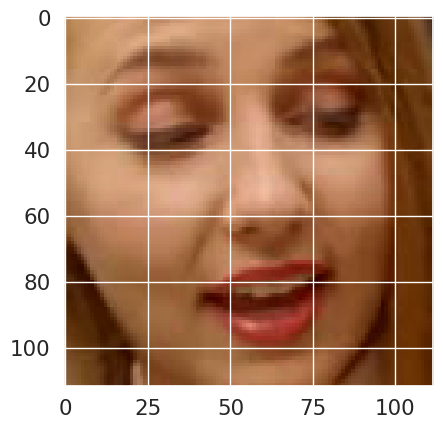

In [40]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

# video_files =  glob.glob("/content/drive/MyDrive/DeepFake/FF++/facecropped/fake/*.mp4")
# video_files += glob.glob('/content/drive/MyDrive/DeepFake/FF++/facecropped/real/*.mp4')

# random.shuffle(video_files)
# random.shuffle(video_files)

print("Filenames : ",video_files)

header_list = ["file","label"]
labels = pd.read_csv('/content/drive/MyDrive/DeepFake/FF++/labels.csv',names=header_list)

train_videos = video_files[:int(0.65*len(video_files))]
valid_videos = video_files[int(0.65*len(video_files)):]

print("train : " , len(train_videos))
print("test : " , len(valid_videos))

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
print("training data : ",train_data)

val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
print("validation data : ",val_data)

train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [41]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes=2,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [43]:
model = Model().cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

In [52]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [53]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [54]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 1/25] [Batch 48 / 49] [Loss: 0.242563, Acc: 98.45%]Testing
[Batch 26 / 27]  [Loss: 1.084350, Acc: 80.00%]
Accuracy 80.0
[Epoch 2/25] [Batch 48 / 49] [Loss: 0.232439, Acc: 97.42%]Testing
[Batch 26 / 27]  [Loss: 0.731018, Acc: 81.90%]
Accuracy 81.9047619047619
[Epoch 3/25] [Batch 48 / 49] [Loss: 0.109472, Acc: 99.48%]Testing
[Batch 26 / 27]  [Loss: 0.834541, Acc: 80.00%]
Accuracy 80.0
[Epoch 4/25] [Batch 48 / 49] [Loss: 0.130634, Acc: 99.48%]Testing
[Batch 26 / 27]  [Loss: 0.741222, Acc: 83.81%]
Accuracy 83.80952380952381
[Epoch 5/25] [Batch 48 / 49] [Loss: 0.180100, Acc: 98.45%]Testing
[Batch 26 / 27]  [Loss: 0.848309, Acc: 80.95%]
Accuracy 80.95238095238095
[Epoch 6/25] [Batch 48 / 49] [Loss: 0.131502, Acc: 98.45%]Testing
[Batch 26 / 27]  [Loss: 1.379924, Acc: 76.19%]
Accuracy 76.19047619047619
[Epoch 7/25] [Batch 48 / 49] [Loss: 0.318509, Acc: 95.88%]Testing
[Batch 26 / 27]  [Loss: 0.639135, Acc: 82.86%]
Accuracy 82.85714285714286
[Epoch 8/25] [Batch 48 / 49] [Loss: 0.101151, A

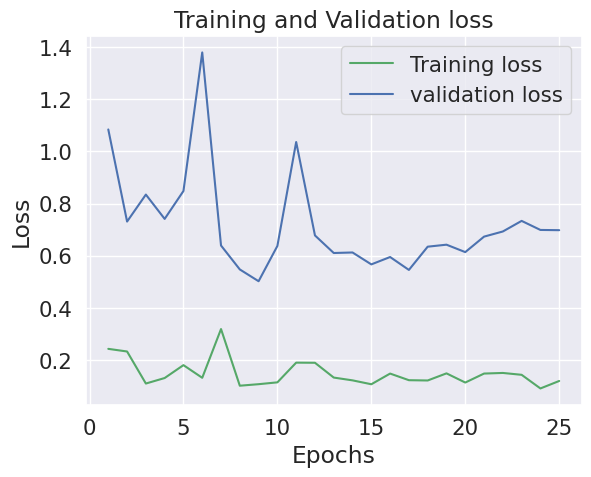

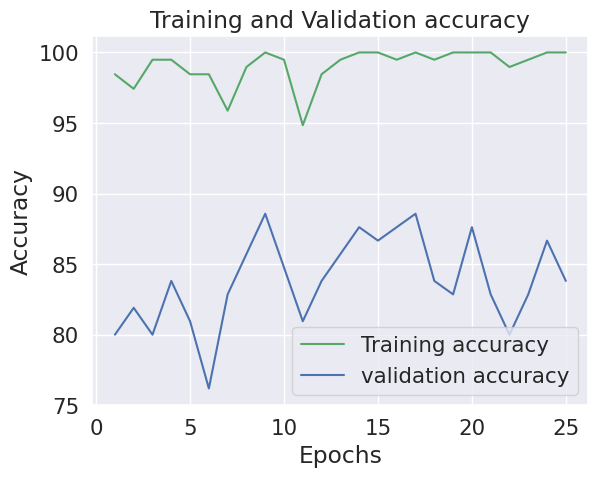

[[45  4]
 [13 43]]
True positive =  45
False positive =  4
False negative =  13
True negative =  43




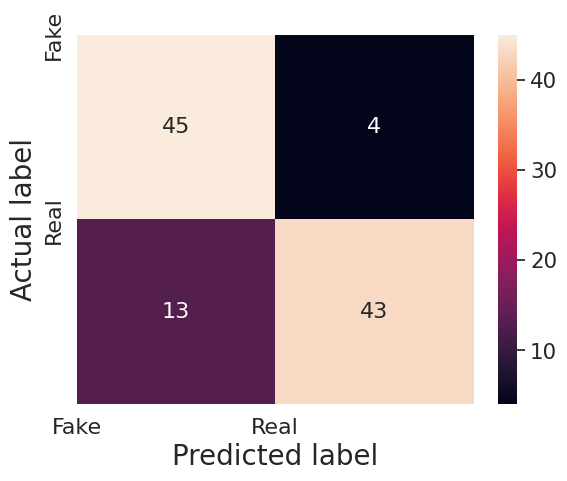

Calculated Accuracy 83.80952380952381


In [55]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-4#0.001
#number of epochs
num_epochs = 25

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()

criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
best_accuracy = 0.0
best_model_state = None

for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)

    if t_acc > best_accuracy:
        best_accuracy = t_acc
        best_model_state = model.state_dict()

if best_model_state is not None:
    torch.save(best_model_state, '/content/drive/MyDrive/DeepFake/best_model_accuracy.pt')
    print("Best test accuracy:", best_accuracy)
    print("Model with the best accuracy saved as 'best_model_accuracy.pt'.")
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)

Last Epoch Accuracy is 83.809 %.

# But we have saved the model which gave best accuracy that is 88.571 %